Dear Joss,

Thanks for all of the kind words and the extension on this project! I didn't even know that I could get an extension at all, but if you're going to give me the opportunity to really make this project great, then I'm going to take it. I hope that these changes are good enough!

As usual, I'm going through each of your comments sequentially.

### Level 1 Feedback

> Figure 1 is either a bad representation of what you are trying to show or simply does not match the caption as the caption states generation depth of 3 and the figure does not show this.

You're right. This was the result of a particularly unlucky random test not being proofread! As each simulation is randomly-generated, sometimes weird behavior can occur, so I just have to fix it by checking my plots to make sure that they display the behavior being discussed (or edit the captions to reflect the behavior of the plot).

> Your interpretation of early neutron behaviour in your Fig 2. is incorrect or at least incomplete. At first, neutrons are spread evenly throughout, but in the next generation neutrons near the edge are more likely to leave, and ones away from the edge are likely not to leave so your distribution tends toward more neutrons away from the edge than the edge as the long-term behaviour. As the system transitions from uniform to fewer neutrons near the edge, the $k$ value continues to climb.

You're right. I hadn't really thought of it like that. I also made some key errors in how I interpreted the simulation, so I'll first break down the problems with my current description then apply your fixes.

First, I started with the sentence

"A clear upward trend in mean replication rate as a function of generation can be seen, and this seems counterintuitive at first, as initial Neutrons are statistically most likely to be toward the exact center of the box, so later Neutrons become more likely to spread outward radially (which implies the opposite trend)."

but this is actually wrong! The intent of the random initial placement is to have a uniform distribution of starting neutrons throughout the entirety of the box three-dimensionally, so there is actually no particular statistical likelihood of the neutrons being placed toward the center of the box. Furthermore, they aren't necessarily more likely to spread outward radially from the center of the box for successive generations.

A much more accurate interpretation of the situation is based on understanding the generational evolution for neutrons based on seeing their direction of successive movement as evenly distributed, which is as you describe. Neutrons that are closer to the edge are more likely to leave the box and neutrons that are closer to the centre are less likely to leave the box, so essentially, the initially random distribution of neutrons is more likely to have a greater distribution of neutrons toward the edges and away from the centre as in the long-run, the neutrons within the centre will be replicated and the neutrons toward the edges will be lost.

The next problem was my mathematical interpretation:

"However, this trend of increase is likely the result of the mathematical spectrum of possible $k$ values that can be produced at each neutron level. The first generation can only ever replicate 0, 1, or 2 neutrons exactly, so an individual neutron $i$ will have exactly $k_i = 0, 1, 2$: a discrete range. So, in short, because the range of possible $k$ values for a given neutron is so limited, the negative contribution from low $k$ values will be much higher."

What this was supposed to mean was that the statistical contribution from neutrons that don't replicate whatsoever should be disproportionally higher than in later generations purely due to the number of neutrons present in each prior generation being considerably less than the number of neutrons present in each successive generation. This is somewhat true for the first or second generation, but this doesn't actually correctly capture the overall trend of multiplication rate increase as the system stabilizes (and this characteristic can be seen any longer replication rate vs. generation graph, such as figures 7 or 8.

Altogether, to fix these issues, I'll just change the description from

"**Figure 2.** A clear upward trend in mean replication rate as a function of generation can be seen, and this seems counterintuitive at first, as initial Neutrons are statistically most likely to be toward the exact center of the box, so later Neutrons become more likely to spread outward radially (which implies the opposite trend). However, this trend of increase is likely the result of the mathematical spectrum of possible $k$ values that can be produced at each neutron level. The first generation can only ever replicate 0, 1, or 2 neutrons exactly, so an individual neutron $i$ will have exactly $k_i = 0, 1, 2$: a discrete range. So, in short, because the range of possible $k$ values for a given neutron is so limited, the negative contribution from low $k$ values will be much higher."

to

"**Figure 2.** For this box geometry, consisting of 250 initial neutrons and 300 replications over 3 generations for a 10 by 10 by 10 cubic box, the multiplication rate is initially growing (for the first few generations) as the spatial distribution of neutrons trends from the starting random distribution to the long-run stable distribution. This is because the starting random distribution is evenly distributed throughout the box, but neutrons closer to the centre are more likely to be replicated whereas neutrons closer to the edges are more likely to be lost, so a long-run stable distribution of neutrons would have more neutrons towards the centre and less neutrons towards the edges. This means that the initial random distribution must have a higher proportion of neutrons distributed towards the edges and a lower proportion of neutrons towards the centre, and this means that it must have a lower replication rates than toward the stable case. (All of this, however, assumes that the reactor's geometry is able to trend towards a stable multiplication rate, and does not apply for the unstable geometry which tend towards no replication whatsoever, and this will be addressed in further examples.)"

> Figs 2: State your initial number of neutrons and number of replications. Yes, it is stated earlier in the section, but is very easy to overlook.

I'll make sure to add the following snippet to the beginning of this:

"..., consisting of 250 initial neutrons and 300 replications over 3 generations for a 10 by 10 by 10 cubic box, ..."

> Further to the above, the k-values in Figures 3-5 do not really make sense a described by 250 neutrons $\times$ 300 replications. These would be more correctly described as 1 initial neutron with ~50,000 replications, but I also don't understand why the sum of the frequencies on Figure 3 isn't $250 \times 300 = 75,000$

Okay, there are two key parts to address here. First, your assertion

> These would be more correctly described as 1 initial neutron with ~50,000 replications

is completely correct, and this is the result of my problem of treating initial neutrons as entirely separate and un-associated trees rather than considering all of the neutrons in a given generation together for a certain replication, and this is an issue that I'll remedy under your first consideration of level 2 feedback.

Next,

> I also don't understand why the sum of the frequencies on Figure 3 isn't $250 \times 300 = 75,000$


the reason why this is the case is because of the calculation of multiplication rate requiring two generations of data, and this directly ties into the problem previously described of treating each tree individually. Think of it like this, each simulation essentially produces a list of trees in some form like

```
- LOST  start=(6.5, 0.51, 7.73)  ->  end=(6.28, -3.0, 6.68)
- ACTIVE  start=(2.88, 5.03, 5.43)  ->  end=(4.69, 5.55, 3.02)
  - ACTIVE  start=(4.69, 5.55, 3.02)  ->  end=(3.99, 5.76, 0.2)
    - LOST  start=(3.99, 5.76, 0.2)  ->  end=(-1.0, 4.66, -2.43)
    - ACTIVE  start=(3.99, 5.76, 0.2)  ->  end=(4.11, 4.52, 0.06)
      - LOST  start=(4.11, 4.52, 0.06)  ->  end=(4.33, 4.67, -0.4)
      - ACTIVE  start=(4.11, 4.52, 0.06)  ->  end=(4.59, 5.26, 0.45)
  - ACTIVE  start=(4.69, 5.55, 3.02)  ->  end=(4.98, 5.83, 2.36)
    - LOST  start=(4.98, 5.83, 2.36)  ->  end=(4.75, 6.14, 3.11)
    - ACTIVE  start=(4.98, 5.83, 2.36)  ->  end=(4.98, 5.83, 0.65)
      - ACTIVE  start=(4.98, 5.83, 0.65)  ->  end=(5.12, 5.83, 0.96)
      - ACTIVE  start=(4.98, 5.83, 0.65)  ->  end=(4.86, 5.97, 1.36)
- LOST  start=(3.83, 2.92, 2.3)  ->  end=(3.88, 1.87, 12.5)
- ACTIVE  start=(3.82, 2.83, 7.95)  ->  end=(3.99, 3.12, 7.65)
  - ACTIVE  start=(3.99, 3.12, 7.65)  ->  end=(2.16, 3.68, 6.04)
    - ACTIVE  start=(2.16, 3.68, 6.04)  ->  end=(1.84, 3.2, 5.53)
      - ACTIVE  start=(1.84, 3.2, 5.53)  ->  end=(1.59, 3.59, 4.57)
      - ACTIVE  start=(1.84, 3.2, 5.53)  ->  end=(0.55, 2.46, 9.51)
    - ACTIVE  start=(2.16, 3.68, 6.04)  ->  end=(2.13, 3.64, 5.96)
      - ACTIVE  start=(2.13, 3.64, 5.96)  ->  end=(1.67, 3.03, 9.91)
      - ACTIVE  start=(2.13, 3.64, 5.96)  ->  end=(2.28, 3.36, 7.26)
  - ACTIVE  start=(3.99, 3.12, 7.65)  ->  end=(4.49, 3.11, 8.66)
    - ACTIVE  start=(4.49, 3.11, 8.66)  ->  end=(4.52, 3.06, 8.74)
      - LOST  start=(4.52, 3.06, 8.74)  ->  end=(4.53, 4.0, 11.13)
      - LOST  start=(4.52, 3.06, 8.74)  ->  end=(4.53, 3.06, 11.33)
    - LOST  start=(4.49, 3.11, 8.66)  ->  end=(2.01, -0.26, 6.13)
...
```

and from this, we can calculate a list of the number of neutrons present in each tree that aren't lost by each generation, so the above tree would become something like

```python
[[0]
 [1,2,2,3]
 [0]
 [1,2,3,4]]
```

so what this means is that neutrons that are lost aren't counted, including in that first generation. These lists of neutrons counts then each individually turn into lists of $k$ values using the formula $$k_{i} = \frac{n_{i}}{n_{i-1}}$$ where $n_i$ is the number of neutrons for generation $i$, so this would become something like

```python
[[],
 [2, 1, 3/2],
 [],
 [2, 3/2, 4/3]]
```

so, therefore, some of these trees just aren't going to produce a multiplication rate at all because they are initially lost. The problem with this present method, as you point out, is that these empty trees should really store zeros (so all of the missing points are actually just zero multiplication rates, and this happens because I would have had to program in a way to implicitly calculate that $0/0 = 0$), but the root issue, more fundamentally than anything, is that these lists should have been collated to begin with, i.e., we should have collated the list by generation of

```python
[[0]
 [1,2,2,3]
 [0]
 [1,2,3,4]]
```

into a single list storing the sum for each generation, like

```python
[2, 4, 5, 7]
```

then calculated the $k$-values from that, which produces

```python
[2, 5/4, 7/5]
```

In short, both of the issues you point out are actually the same root issue: not treating the trees for each simulation as collated generations.

> > "To do this, we can just pick some generation depth (which I’ll refer to as the ‘base’ generation) that we know will be lower than minimal stable generation (as this should have a higher standard
error)" 
>
> I'm not following you here

And, as usual, you aren't following because this was really poorly written. Exactly what I wrote was

"To do this, we can just pick some generation depth (which I'll refer to as the 'base' generation) that we know will be lower than minimal stable generation (as this should have a higher standard error) then pick a replication rate that minimizes the relative standard error for a case simulation."

and I don't like this as I feel like it's far too verbose and awkward, mainly because all it is trying to say is that I'm just somewhat arbitrarily picking the number of generations to model for this case and trying to minimize the standard error for the multiplication rate for that generation, and the only necessary criterion for the generation that I pick is that it needs to be at a point that would reasonably be before whatever the long-run convergence generation would be as earlier generations (before convergence) generally have higher error. I think I can simplify this by just writing

"To do this, we can model the simulation for three generations as the number of generations required for the system to stabilize is likely higher, and systems before stabilization generally seem to have higher error in the multiplication rate than systems after stabilization, so if the error is minimized by three generations, then it should remain minimized once the system stabilizes."

> Fig 6: It depends what you mean by long term. As long as you start with enough neutrons and $k$ that is not too close to 0, you can get a steady-state value for $k$. However, at some point you run out of neutrons so the system is only metastable for as long as you still have a supply of neutrons.

This is true in theory, and I understand what you mean. I think the real issue with this is what I mean by "trending towards zero" or being unstable for certain simulations. 

Consider the case of having an infinite number of neutrons. For an infinite number of neutrons, on each generation, an infinite number of multiplications will occur, so every possible ending state in three-dimensional space will occur (essentially, we start with having an infinite number of neutrons in our box distributed across all of the possible spaces within the box, assuming that the neutrons take up an infinitesimal space such that the box can house an infinite number, and then on every multiplication, every possible place within three dimensional space that the neutrons can go to will be reached due to having an infinite number, and that means that the box will remain filled with infinite neutrons). What this means is, with infinite neutrons, all systems will continue to retain neutrons indefinitely regardless of their geometry, even if they have an infinitesimal size.

However, we need to port this to reality: we don't have an infinite number of neutrons. What this means is that for systems that don't trend to stability, the number of generations for which they continue to hold neutrons should be a direct function of the number of initial neutrons we started with (a fairly intuitive result).

So the problem here, I think, isn't in the simulation, but rather, in how I described this. The caption of figure 6 goes

"**Figure 6.** The progression didn't even make it to 5 generations, so this geometry is trivially unstable, and there would be absolutely no uncertainty in the long-run $k$-value as being completely zero."

and the issue with this is that it fails to account for the fact that the term "trivially unstable" is *relative to the bounds of this simulation*, i.e., it's based on the number of starting neutrons that are given to each simulation. What I'll do to clarify this is to add the statement that

"Multiplication rates under this simulation have the ability to trend to zero whatsoever because of the limited number of neutrons that initially begin within the box. The number of generations for which neutrons are able to continue multiplying for a given simulation is a function of the number of neutrons that the system starts out with and the geometry of the box, and this length of time is shorter for more unstable geometries and longer for more stable geometries."

> You can probably establish a much more compelling argument for your minimum stable generation depth in Fig 8. by increasing both your initial number of neutrons and your number of replications.

**The following was my initial response to this note:**

Good point. I see what you mean, this isn't a contour coordinate, it's an exploration to find the minimum stable generation depth, so I should realistically greatly increase the number of initial neutrons and replications. Great idea, actually. I'll increase the number of initial neutrons from 250 to 1000 and the number of replications from 100 to 400, just for added accuracy. I'll also add a little description for why I'm doing this:

"To be absolutely certain that the data obtained at this point is correct, we can also use a much higher number of initial neutrons and number of replications to have as accurate of data as possible. Therefore, we'll use 1000 starting neutrons and 400 replications, as opposed to the 250 neutrons and 100 replications in other cases."

**My revised response follows here:**

I have since changed my mind about this point, actually. Performing a simulation with these parameters yielded this graph

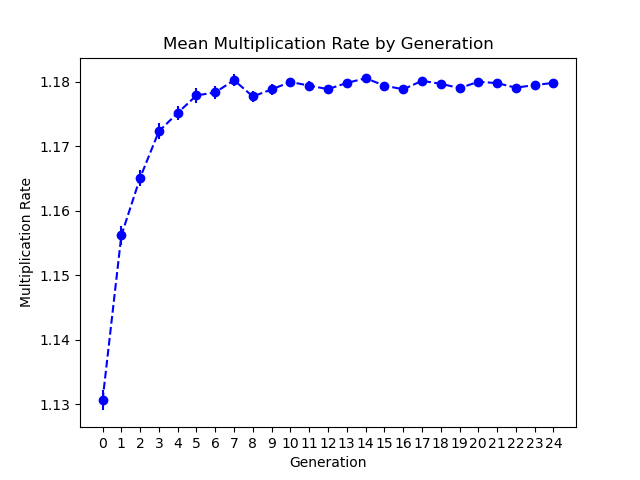

so the convergence to a stable multiplication rate happened much sooner than in the case of using the lower number of initial neutrons and replications. The issue with this is that this means that the rate of convergence to stability is positively correlated with the number of initial neutrons and the number of replications (which we know by comparing it with our previous tests), so that means that if I were to determine the minimum stable generation depth from this graph (as it converges around generation 3 for such a precise test), the tests performed within the phase space exploration contour shouldn't be converged unless the full phase is calculated using the same paramteres of 400 replications and 1000 initial neutrons. In simpler words, the number of initial neutrons and replications have to be the same in this test case and in the phase exploration because the rate of convergence needs to be the same for the results to be accurate.

For this reason, I'll have to keep it at the previous values.

> You are inconsistent with your name of multiplication rate, replication rate, etc.

You're right! I definitely messed up a lot here because I keep thinking of the multiplication of neutrons as replications. This means that each time I refer to multiplication or the multiplication rate, I am referring to neutron multiplication (the correct association), but each time I'm referring to replication, I may be referring to simulation replication (the correct term) or neutron multiplication (the wrong term).

This is especially a problem in my introduction and the labels of my graphs. I've just gone through and manually checked each reference to replication and changed them accordingly.

### Level 2 Feedback

> Your current implementation of multiplication rates treats each of the (usually) 250 initial neutrons as independent single-neutron trees and calculates k individually for each tree (resulting in initial neutrons * replications individual k values pooled together), rather than treating all 250 neutrons as one population per replication and calculating a single k value from the total population count. This causes much larger statistical fluctuations because individual tree k values are ratios of small integers (0/1, 3/2, 2/1, etc.) rather than ratios of large population counts (hundreds of neutrons), making the measurements highly sensitive to single-particle stochastic events, so extreme outliers often dominate your statistics. This issue is something that Homework 17 was designed to guard against, but you submitted something for that assignment that did not check the results of your simulation against results from correctly implemented physics and population-level statistics. Fixing this issue in your code and revising your write-up to account for differences in findings is a sizeable task, but is necessary for Level 2 distinction in this case.
>
> Another hint that there is an important issue is that Fig 12 shows for an aspect ratio of 20, the multiplication rate suddenly jumps back up to 1 and has no error.

I understand what you mean. I hadn't noticed for exactly the reason that you claim: I just chalked up the failure in my histograms on Homework 17 to be the result of voodoo statistical magic in my simulations (more or less). There is very good news, though.

> Fixing this issue in your code and revising your write-up to account for differences in findings is a sizeable task, but is necessary for Level 2 distinction in this case.

This is actually a much easier fix than it may seem. The multiplication rates are calculated after each generation with the code

```python
for tree in simulation_result:
    k_values = calculate_k_values(tree)
    for j, k in enumerate(k_values):
        generation_data[j].append(k)
```
(Let's call this code segment 1.)

and the function `calculate_k_values` implicitly calculates the number of neutrons in each generation for a given tree

```python
def calculate_k_values(tree: NeutronNode):
    """
    From a neutron tree, return an array of k 
    values (n_next / n_current) for each generation. 
    """
    counts = get_neutrons_in_each_generation(tree)
    return counts[1:] / counts[:-1]
```
(Let's call this code segment 2.)

but all I actually need to do is just calculate the number of neutrons in each generation first for every tree, collate these values, then calculate the $k$ values for all of them to begin with. I can do this by rewriting (1) as

```python
k_values = calculate_k_values(simulation_result, max_generation)
for j, k in enumerate(k_values):
    generation_data[j].append(k)
```

so now `calculate_k_values` operates on the full list of trees. From there, we can rewrite (2) as

```python
def calculate_k_values(trees: list[NeutronNode], max_generation: int):
    """
    For a list of neutron trees, calculates the total number 
    of neutrons in each generation, then returns an array of 
    k values (n_next / n_current) for each generation. 
    """
    counts = np.zeros(max_generation + 1)
    for tree in trees:
        tree_counts = get_neutrons_in_each_generation(tree)
        
        if tree_counts.size < max_generation + 1:
            tree_counts = np.pad(
                tree_counts, 
                (0, max_generation + 1 - tree_counts.size), 
                mode='constant', 
                constant_values=0
            )
        
        counts = np.add(counts, tree_counts)
    
    return np.divide(
        counts[1:],
        counts[:-1],
        out=np.zeros_like(counts[1:], dtype=float),
        where=counts[:-1] != 0
    )
```

Now, as you point out, this adds the major problem of interpreting my histograms (as they are now producing much more varied results). Otherwise, though, this doesn't actually change the interpretations of other figures because the k-values produced at each generation are largely still the same (because its the same number of neutrons). 

For example, figure 3 has to  be changed from

"**Figure 3.** The first generation will usually be able to multiplying into one or two more neutrons rather than producing none due to the nature of always having to start out within the box (and being more likely to begin closer to the middle than closer to the edge as a result)."

to something more like

"**Figure 3.** The distribution of $k$-values produced by the Monte-Carlo simulation are a normal distribution centered around a particular value, and (as will be seen in comparison with figures 4 and 5) for the initial generation, there is a disproportionately higher amount of considerably lower multiplication rates (in the lowest decile) due to the aforementioned higher distribution of neutrons along the edges of the box."

The next graphs have to follow similarly. The main difference is that the distribution is now gaussian and continuous rather than discrete.

> Your get_next_neutron_position function does not correctly sample all 3D directions uniformly. Uniform sampling of $\varphi$ overweights the poles because the solid angle element $d \Omega = \sin \varphi d \varphi d \theta$ shrinks near $\varphi = 0, \pi$. You need to sample $\cos \varphi$ uniformly from $[-1, 1]$ instead to compensate for this geometric factor like was shown in homework 17. Fixing this is quite straight forward, but may result in a occasional sufficiently large changes in your results that you will also need to rewrite some passages, captions, etc.

You're right. I'll just directly do that.

```python
...
    cos_phi = np.random.uniform(-1, 1)
    phi   = np.arccos(cos_phi)
...
```

The rest of the code looks almost entirely the same.

## Errata

I'd also like to add that there are certain changes that I've made as altering the tree-consideration made my simulation much more accurate. For example, the previously high-uncertainty region is now not that relatively uncertain (before, it was about 70% uncertain and now it's only 6% uncertain), and they converge to their long-run stability much faster. So I had to change, for example, figure 18's caption from

"**Figure 18.** Again, we see the same trend: the uncertainty multiplication rate actually increases with respect to the generation for these points, and no obvious trend can be seen in the progression pattern for these points (so the $k$ value obtained from them can be effectively said to be random). This begs the question of if the geometries along this line converge to a specific long-run multiplication rate whatsoever (which, if false, would counteract the main assumption of this previous investigation), but seeing as the considerations of this experiment are largely only focused on the trends observed along trivial cross-sections for even aspect ratios or large volumes rather than this section, further investigation into this region can be left for future exploration."

to

"**Figure 18.** Again, we see the same trend: the uncertainty multiplication rate actually increases with respect to the generation for these points, but this geometry is still unstable and converges to a multiplication rate of zero."

so the most interesting finding from these points is in the uncertainty, but not in the multiplication rate.

Altogether, thank you for all of the comments (and for the term). Computational physics has been really fun, and I'm going to continue learning how to get better at making computational simulations as much as I can.

Regards,

Mufaro Machaya